In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
import tensorflow
from keras.utils import to_categorical
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [49]:
pd.set_option('display.max_columns', None)
final=pd.read_csv("final.csv")
work=final.copy(deep=True)
work

,ID,age,years_of_schooling,disable_person,gender,marital_status,in_house_position,education_level,region,area,house_owned_status,monthly_rent_payment,bedrooms,bathrooms,condition_roof,condition_floor,condition_walls,material_outside_wall,floor_material,roof_material,water_provision,electricity,toilet,cooking_energy,rubbish_disposal,Household_level_identifier,household_size,males_younger_12,males_older_12,female_younger_12,female_older_12,children_0_to_19,adult_below_65,adult_above_65,edu_male_head_years,edu_female_head_years,edu_avg_above_18,refrigerator,no_of_tablets,computer,television,mobilephone,no_of_mobile_phone,overcrowding,dependency,Target
0,ID_279628684,43.0,10.0,0.0,1.0,4.0,1.0,4.0,1.0,1.0,3.0,190000.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,21eb7fcc1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,10.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.000000,4.0
1,ID_f29eb3ddd,67.0,12.0,0.0,1.0,4.0,1.0,8.0,1.0,1.0,3.0,135000.0,1.0,3.0,2.0,2.0,2.0,5.0,6.0,1.0,2.0,1.0,2.0,2.0,1.0,0e5d7a658,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,12.000000,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,8.000000,4.0
2,ID_68de51c94,92.0,11.0,1.0,2.0,6.0,1.0,0.0,1.0,1.0,1.0,150000.0,2.0,6.0,3.0,3.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2c7317ea8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,11.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.500000,8.000000,4.0
3,ID_d671db89c,17.0,9.0,0.0,1.0,7.0,3.0,4.0,1.0,1.0,3.0,180000.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2b58d945f,4.0,0.0,2.0,1.0,1.0,2.0,2.0,0.0,11.0,0.0,11.000000,1.0,1.0,0.0,0.0,1.0,3.0,1.333333,1.000000,4.0
4,ID_d56d6f5f5,37.0,11.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,3.0,180000.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2b58d945f,4.0,0.0,2.0,1.0,1.0,2.0,2.0,0.0,11.0,0.0,11.000000,1.0,1.0,0.0,0.0,1.0,3.0,1.333333,1.000000,4.0
5,ID_ec05b1a7b,38.0,11.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,180000.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2b58d945f,4.0,0.0,2.0,1.0,1.0,2.0,2.0,0.0,11.0,0.0,11.000000,1.0,1.0,0.0,0.0,1.0,3.0,1.333333,1.000000,4.0
6,ID_e9e0c1100,8.0,2.0,0.0,2.0,1.0,3.0,2.0,1.0,1.0,3.0,180000.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2b58d945f,4.0,0.0,2.0,1.0,1.0,2.0,2.0,0.0,11.0,0.0,11.000000,1.0,1.0,0.0,0.0,1.0,3.0,1.333333,1.000000,4.0
7,ID_3e04e571e,7.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,1.0,3.0,130000.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,d6dae86b7,4.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,9.0,0.0,10.000000,1.0,0.0,0.0,0.0,1.0,1.0,4.000000,1.000000,4.0
8,ID_1284f8aad,30.0,9.0,0.0,1.0,2.0,1.0,4.0,1.0,1.0,3.0,130000.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,d6dae86b7,4.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,9.0,0.0,10.000000,1.0,0.0,0.0,0.0,1.0,1.0,4.000000,1.000000,4.0
9,ID_51f52fdd2,28.0,11.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,3.0,130000.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,d6dae86b7,4.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,9.0,0.0,10.000000,1.0,0.0,0.0,0.0,1.0,1.0,4.000000,1.000000,4.0


In [3]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred)) 
    
    products=[1,2,3,4]
    cm = confusion_matrix(y_test, result)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cm, products)
    plt.show()
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100)
    
    print ("Sensitivity for 1 : ", (cm[0,0]/sum(cm[0]))*100)
    print ("Sensitivity for 2 : ", (cm[1,1]/sum(cm[1]))*100)
    print ("Sensitivity for 3 : ", (cm[2,2]/sum(cm[2]))*100)
    print ("Sensitivity for 4 : ", (cm[3,3]/sum(cm[3]))*100)
    

In [4]:
data = work[['age', 'years_of_schooling', 'disable_person', 'gender',
       'marital_status', 'in_house_position', 'education_level', 'region',
       'area', 'house_owned_status', 'monthly_rent_payment', 'bedrooms',
       'bathrooms', 'condition_roof', 'condition_floor', 'condition_walls',
       'material_outside_wall', 'floor_material', 'roof_material',
       'water_provision', 'electricity', 'toilet', 'cooking_energy',
       'rubbish_disposal', 'household_size',
       'males_younger_12', 'males_older_12', 'female_younger_12',
       'female_older_12', 'children_0_to_19', 'adult_below_65',
       'adult_above_65', 'edu_male_head_years', 'edu_female_head_years',
       'edu_avg_above_18', 'refrigerator', 'no_of_tablets', 'computer',
       'television', 'mobilephone', 'no_of_mobile_phone', 'overcrowding',
       'dependency']].copy(deep=True)

x_train=data.loc[1:8557,].values
x_test=data.loc[8557:9556,].values
y_train=work.loc[1:8557,'Target'].values.astype(int)
y_test=work.loc[8557:9556,'Target'].values.astype(int)


Confusion Matrix: 
 [[ 78   2   1   1]
 [  9 126  89   7]
 [  6  56  73  16]
 [ 18  33  16 469]]


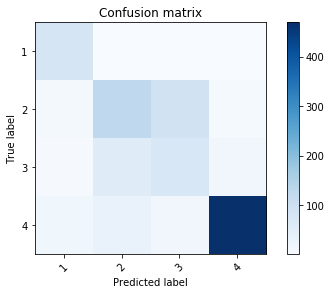

Accuracy :  74.6
Sensitivity for 1 :  95.1219512195122
Sensitivity for 2 :  54.54545454545454
Sensitivity for 3 :  48.34437086092716
Sensitivity for 4 :  87.5


In [5]:
clf_gini = DecisionTreeClassifier( criterion = "gini", max_depth = None)
clf_gini.fit(x_train, y_train)
result=clf_gini.predict(x_test)
cal_accuracy(y_test, result)


Confusion Matrix: 
 [[ 75   5   2   0]
 [  8 125  96   2]
 [  3  82  49  17]
 [  6  28  24 478]]


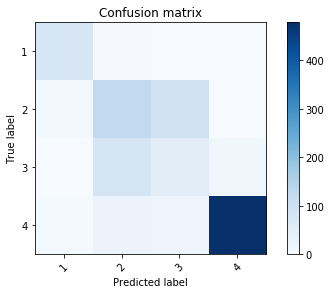

Accuracy :  72.7
Sensitivity for 1 :  91.46341463414635
Sensitivity for 2 :  54.112554112554115
Sensitivity for 3 :  32.450331125827816
Sensitivity for 4 :  89.17910447761194


In [6]:
clf_entropy = DecisionTreeClassifier( criterion = "entropy", max_depth = None)
clf_entropy.fit(x_train, y_train)
result=clf_entropy.predict(x_test)
cal_accuracy(y_test, result)

In [7]:
data = work[['age', 'disable_person', 'gender',
       'marital_status', 'education_level', 'region',
       'area', 'house_owned_status', 'monthly_rent_payment', 
       'condition_roof', 'condition_floor', 'condition_walls',
        'water_provision', 'electricity', 'toilet', 'cooking_energy',
       'rubbish_disposal', 'household_size',
        'refrigerator', 'no_of_tablets', 'computer',
       'television', 'no_of_mobile_phone', 'overcrowding',
       'dependency']].copy(deep=True)


x_train=data.loc[1:8557,].values
x_test=data.loc[8557:9556,].values
y_train=work.loc[1:8557,'Target'].values.astype(int)
y_test=work.loc[8557:9556,'Target'].values.astype(int)

Confusion Matrix: 
 [[ 75   5   1   1]
 [  4 118 101   8]
 [  4  79  57  11]
 [ 12  43   3 478]]


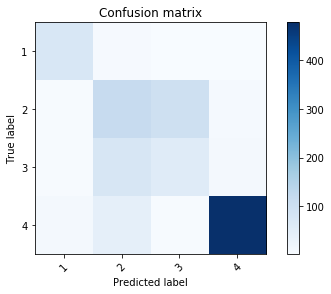

Accuracy :  72.8
Sensitivity for 1 :  91.46341463414635
Sensitivity for 2 :  51.082251082251084
Sensitivity for 3 :  37.74834437086093
Sensitivity for 4 :  89.17910447761194


In [8]:
clf_gini = DecisionTreeClassifier( criterion = "gini", max_depth = None)
clf_gini.fit(x_train, y_train)
result=clf_gini.predict(x_test)
cal_accuracy(y_test, result)

Confusion Matrix: 
 [[ 80   0   1   1]
 [  0 123  96  12]
 [  6  56  76  13]
 [ 15  41  21 459]]


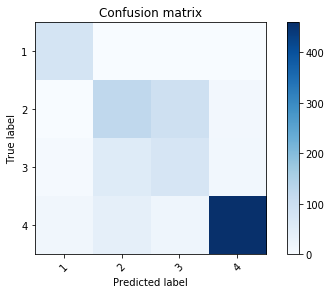

Accuracy :  73.8
Sensitivity for 1 :  97.5609756097561
Sensitivity for 2 :  53.246753246753244
Sensitivity for 3 :  50.331125827814574
Sensitivity for 4 :  85.63432835820896


In [9]:
clf_entropy = DecisionTreeClassifier( criterion = "entropy", max_depth = None)
clf_entropy.fit(x_train, y_train)
result=clf_entropy.predict(x_test)
cal_accuracy(y_test, result)

C:\Users\apoor\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Confusion Matrix: 
 [[ 28  38   8   8]
 [ 62 104  39  26]
 [ 10  79  49  13]
 [ 20  38  24 454]]


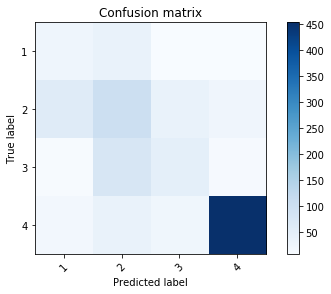

Accuracy :  63.5
Sensitivity for 1 :  34.146341463414636
Sensitivity for 2 :  45.02164502164502
Sensitivity for 3 :  32.450331125827816
Sensitivity for 4 :  84.70149253731343


In [37]:
data = work[['age', 'years_of_schooling', 'disable_person', 'gender',
       'marital_status', 'in_house_position', 'education_level', 'region',
       'area', 'house_owned_status', 'monthly_rent_payment', 'bedrooms',
       'bathrooms', 'condition_roof', 'condition_floor', 'condition_walls',
       'material_outside_wall', 'floor_material', 'roof_material',
       'water_provision', 'electricity', 'toilet', 'cooking_energy',
       'rubbish_disposal', 'household_size',
       'males_younger_12', 'males_older_12', 'female_younger_12',
       'female_older_12', 'children_0_to_19', 'adult_below_65',
       'adult_above_65', 'edu_male_head_years', 'edu_female_head_years',
       'edu_avg_above_18', 'refrigerator', 'no_of_tablets', 'computer',
       'television', 'mobilephone', 'no_of_mobile_phone', 'overcrowding',
       'dependency']].copy(deep=True)


x_train=data.loc[1:8557,].values
x_test=data.loc[8557:9556,].values
y_train=work.loc[1:8557,'Target'].values.astype(int)
y_test=work.loc[8557:9556,'Target'].values.astype(int)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(solver = 'lbfgs',multi_class='auto')
model.fit(x_train, y_train)

result = model.predict(x_test)

cal_accuracy(y_test, result)


Confusion Matrix: 
 [[ 28  38  13   3]
 [ 66 115  21  29]
 [ 16  97  18  20]
 [ 39  23  21 453]]


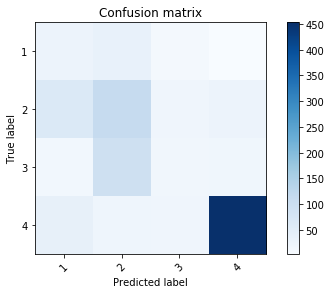

Accuracy :  61.4
Sensitivity for 1 :  34.146341463414636
Sensitivity for 2 :  49.78354978354979
Sensitivity for 3 :  11.920529801324504
Sensitivity for 4 :  84.51492537313433


In [10]:
data = work[['age', 'disable_person', 'gender',
       'marital_status', 'education_level', 'region',
       'area', 'house_owned_status', 'monthly_rent_payment', 
       'condition_roof', 'condition_floor', 'condition_walls',
        'water_provision', 'electricity', 'toilet', 'cooking_energy',
       'rubbish_disposal', 'household_size',
        'refrigerator', 'no_of_tablets', 'computer',
       'television', 'no_of_mobile_phone', 'overcrowding',
       'dependency']].copy(deep=True)

x_train=data.loc[1:8557,].values
x_test=data.loc[8557:9556,].values
y_train=work.loc[1:8557,'Target'].values.astype(int)
y_test=work.loc[8557:9556,'Target'].values.astype(int)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(solver = 'lbfgs',multi_class='auto')
model.fit(x_train, y_train)

result = model.predict(x_test)

cal_accuracy(y_test, result)

In [17]:
data = work[['age', 'years_of_schooling', 'disable_person', 'gender',
       'marital_status', 'in_house_position', 'education_level', 'region',
       'area', 'house_owned_status', 'monthly_rent_payment', 'bedrooms',
       'bathrooms', 'condition_roof', 'condition_floor', 'condition_walls',
       'material_outside_wall', 'floor_material', 'roof_material',
       'water_provision', 'electricity', 'toilet', 'cooking_energy',
       'rubbish_disposal', 'household_size',
       'males_younger_12', 'males_older_12', 'female_younger_12',
       'female_older_12', 'children_0_to_19', 'adult_below_65',
       'adult_above_65', 'edu_male_head_years', 'edu_female_head_years',
       'edu_avg_above_18', 'refrigerator', 'no_of_tablets', 'computer',
       'television', 'mobilephone', 'no_of_mobile_phone', 'overcrowding',
       'dependency']].copy(deep=True)


x_train=data.loc[1:8557,].values
x_test=data.loc[8557:9556,].values
y_train=work.loc[1:8557,'Target'].values.astype(int)
y_test=work.loc[8557:9556,'Target'].values.astype(int)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

y1_train=np.zeros((y_train.shape[0],4), dtype=np.int)
for i in range(0,y_train.shape[0]):
    if y_train[i]==1:
        y1_train[i][0]=1
    if y_train[i]==2:
        y1_train[i][1]=1
    if y_train[i]==3:
        y1_train[i][2]=1
    if y_train[i]==4:
        y1_train[i][3]=1

y1_test=np.zeros((y_test.shape[0],4), dtype=np.int)
for i in range(0,y_test.shape[0]):
    if y_test[i]==1:
        y1_test[i][0]=1
    if y_test[i]==2:
        y1_test[i][1]=1
    if y_test[i]==3:
        y1_test[i][2]=1
    if y_test[i]==4:
        y1_test[i][3]=1

model=Sequential()

model.add(Dense(output_dim = int((data.shape[1]+1)/2), init = 'uniform', activation = 'relu', input_dim = data.shape[1]))
model.add(Dense(output_dim = int((data.shape[1]+1)/2), init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 4, init = 'uniform', activation = 'softmax'))

sgd=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.fit(x_train,y1_train,epochs=1000, batch_size=128)

C:\Users\apoor\Miniconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=43, units=22, kernel_initializer="uniform")`
C:\Users\apoor\Miniconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=22, kernel_initializer="uniform")`
C:\Users\apoor\Miniconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=4, kernel_initializer="uniform")`


Epoch 1/1000
8557/8557 [==============================] - 0s 52us/step - loss: 1.1450 - acc: 0.6314
Epoch 2/1000
8557/8557 [==============================] - 0s 13us/step - loss: 1.0397 - acc: 0.6380
Epoch 3/1000
8557/8557 [==============================] - 0s 13us/step - loss: 1.0362 - acc: 0.6380
Epoch 4/1000
8557/8557 [==============================] - 0s 12us/step - loss: 1.0271 - acc: 0.6380
Epoch 5/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.9694 - acc: 0.6380
Epoch 6/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.8633 - acc: 0.6399
Epoch 7/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.7830 - acc: 0.6777
Epoch 8/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.7077 - acc: 0.7018
Epoch 9/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.6520 - acc: 0.7205
Epoch 10/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.6270 - acc: 0.7309

8557/8557 [==============================] - 0s 14us/step - loss: 0.2137 - acc: 0.9162
Epoch 83/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.2065 - acc: 0.9190
Epoch 84/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.2074 - acc: 0.9173
Epoch 85/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.2095 - acc: 0.9177
Epoch 86/1000
8557/8557 [==============================] - 0s 16us/step - loss: 0.2014 - acc: 0.9253
Epoch 87/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.2034 - acc: 0.9192
Epoch 88/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.1978 - acc: 0.9254
Epoch 89/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.1971 - acc: 0.9226
Epoch 90/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.2010 - acc: 0.9238
Epoch 91/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.1939 - acc: 0.9246
Epoc

8557/8557 [==============================] - 0s 13us/step - loss: 0.1052 - acc: 0.9652
Epoch 163/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.1014 - acc: 0.9654
Epoch 164/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0978 - acc: 0.9700
Epoch 165/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0979 - acc: 0.9688
Epoch 166/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0969 - acc: 0.9690
Epoch 167/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.1006 - acc: 0.9674
Epoch 168/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0936 - acc: 0.9702
Epoch 169/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.1016 - acc: 0.9672
Epoch 170/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.1020 - acc: 0.9658
Epoch 171/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0891 - acc: 0.

8557/8557 [==============================] - 0s 13us/step - loss: 0.0696 - acc: 0.9774
Epoch 243/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0736 - acc: 0.9786
Epoch 244/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0709 - acc: 0.9778
Epoch 245/1000
8557/8557 [==============================] - 0s 17us/step - loss: 0.0610 - acc: 0.9826
Epoch 246/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0577 - acc: 0.9808
Epoch 247/1000
8557/8557 [==============================] - 0s 17us/step - loss: 0.0600 - acc: 0.9822
Epoch 248/1000
8557/8557 [==============================] - 0s 16us/step - loss: 0.0570 - acc: 0.9850
Epoch 249/1000
8557/8557 [==============================] - 0s 17us/step - loss: 0.0603 - acc: 0.9819
Epoch 250/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0556 - acc: 0.9840
Epoch 251/1000
8557/8557 [==============================] - 0s 17us/step - loss: 0.0469 - acc: 0.

8557/8557 [==============================] - 0s 12us/step - loss: 0.0915 - acc: 0.9760
Epoch 323/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0479 - acc: 0.9845
Epoch 324/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0564 - acc: 0.9839
Epoch 325/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0606 - acc: 0.9829
Epoch 326/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0434 - acc: 0.9882
Epoch 327/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0434 - acc: 0.9876
Epoch 328/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0586 - acc: 0.9838: 0s - loss: 0.0608 - acc: 0.983
Epoch 329/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0504 - acc: 0.9855
Epoch 330/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0368 - acc: 0.9903
Epoch 331/1000
8557/8557 [==============================] - 0s 16

8557/8557 [==============================] - 0s 15us/step - loss: 0.0274 - acc: 0.9929
Epoch 402/1000
8557/8557 [==============================] - 0s 57us/step - loss: 0.0261 - acc: 0.9943
Epoch 403/1000
8557/8557 [==============================] - 1s 62us/step - loss: 0.0249 - acc: 0.9938
Epoch 404/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0304 - acc: 0.9919
Epoch 405/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0361 - acc: 0.9897
Epoch 406/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0337 - acc: 0.9912
Epoch 407/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0473 - acc: 0.9876
Epoch 408/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0435 - acc: 0.9890
Epoch 409/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0624 - acc: 0.9828
Epoch 410/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0473 - acc: 0.

8557/8557 [==============================] - 0s 13us/step - loss: 0.0180 - acc: 0.9957
Epoch 482/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0211 - acc: 0.9946
Epoch 483/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0203 - acc: 0.9959
Epoch 484/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0210 - acc: 0.9953
Epoch 485/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0223 - acc: 0.9953
Epoch 486/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0179 - acc: 0.9958
Epoch 487/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0164 - acc: 0.9960
Epoch 488/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0212 - acc: 0.9958
Epoch 489/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0220 - acc: 0.9953
Epoch 490/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0233 - acc: 0.

8557/8557 [==============================] - 0s 13us/step - loss: 0.0233 - acc: 0.9949
Epoch 562/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0296 - acc: 0.9931
Epoch 563/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0289 - acc: 0.9929
Epoch 564/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0205 - acc: 0.9944
Epoch 565/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0258 - acc: 0.9933
Epoch 566/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0503 - acc: 0.9871
Epoch 567/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0324 - acc: 0.9917
Epoch 568/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0569 - acc: 0.9859
Epoch 569/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0382 - acc: 0.9901
Epoch 570/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0378 - acc: 0.

8557/8557 [==============================] - 0s 13us/step - loss: 0.0394 - acc: 0.9891
Epoch 642/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0269 - acc: 0.9930
Epoch 643/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0284 - acc: 0.9949
Epoch 644/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0282 - acc: 0.9921
Epoch 645/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0273 - acc: 0.9922
Epoch 646/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0298 - acc: 0.9914
Epoch 647/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0194 - acc: 0.9949
Epoch 648/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0253 - acc: 0.9939
Epoch 649/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0272 - acc: 0.9932
Epoch 650/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0295 - acc: 0.

8557/8557 [==============================] - 0s 13us/step - loss: 0.0167 - acc: 0.9954
Epoch 722/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0182 - acc: 0.9958
Epoch 723/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0145 - acc: 0.9967
Epoch 724/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0275 - acc: 0.9929
Epoch 725/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0310 - acc: 0.9917
Epoch 726/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0240 - acc: 0.9924
Epoch 727/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0489 - acc: 0.9888
Epoch 728/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0336 - acc: 0.9892
Epoch 729/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0308 - acc: 0.9921
Epoch 730/1000
8557/8557 [==============================] - 0s 45us/step - loss: 0.0223 - acc: 0.

8557/8557 [==============================] - 0s 13us/step - loss: 0.0147 - acc: 0.9972
Epoch 802/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0188 - acc: 0.9961
Epoch 803/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0179 - acc: 0.9972
Epoch 804/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0238 - acc: 0.9950
Epoch 805/1000
8557/8557 [==============================] - 0s 43us/step - loss: 0.0181 - acc: 0.9957
Epoch 806/1000
8557/8557 [==============================] - 0s 56us/step - loss: 0.0148 - acc: 0.9970
Epoch 807/1000
8557/8557 [==============================] - 0s 29us/step - loss: 0.0208 - acc: 0.9958
Epoch 808/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0180 - acc: 0.9959
Epoch 809/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0172 - acc: 0.9954
Epoch 810/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0220 - acc: 0.

8557/8557 [==============================] - 0s 57us/step - loss: 0.0166 - acc: 0.9959
Epoch 882/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0193 - acc: 0.9959
Epoch 883/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0173 - acc: 0.9970
Epoch 884/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0185 - acc: 0.9961
Epoch 885/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0142 - acc: 0.9971
Epoch 886/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0117 - acc: 0.9977
Epoch 887/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0108 - acc: 0.9978
Epoch 888/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0137 - acc: 0.9967
Epoch 889/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.0119 - acc: 0.9968
Epoch 890/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0159 - acc: 0.

8557/8557 [==============================] - 0s 13us/step - loss: 0.0133 - acc: 0.9977
Epoch 962/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0096 - acc: 0.9980
Epoch 963/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0108 - acc: 0.9977
Epoch 964/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0171 - acc: 0.9977
Epoch 965/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0123 - acc: 0.9981
Epoch 966/1000
8557/8557 [==============================] - 0s 15us/step - loss: 0.0123 - acc: 0.9975
Epoch 967/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0100 - acc: 0.9980
Epoch 968/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0125 - acc: 0.9974
Epoch 969/1000
8557/8557 [==============================] - 0s 14us/step - loss: 0.0136 - acc: 0.9970
Epoch 970/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.0097 - acc: 0.

Confusion Matrix: 
 [[ 49  17  15   1]
 [ 12  94  71  54]
 [ 15  28  56  52]
 [ 19  21  11 485]]


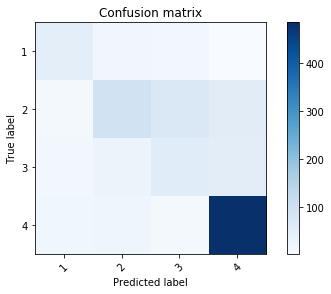

Accuracy :  68.4
Sensitivity for 1 :  59.756097560975604
Sensitivity for 2 :  40.692640692640694
Sensitivity for 3 :  37.086092715231786
Sensitivity for 4 :  90.48507462686567


In [18]:
result = model.predict(x_test)
result=np.argmax(result, axis = 1)+1
cal_accuracy(y_test, result)

In [15]:
data = work[[ 'monthly_rent_payment',
       'area','household_size',
         'no_of_tablets', 
        'no_of_mobile_phone', 'overcrowding',
       'dependency']].copy(deep=True)


x_train=data.loc[1:8557,].values
x_test=data.loc[8557:9556,].values
y_train=work.loc[1:8557,'Target'].values.astype(int)
y_test=work.loc[8557:9556,'Target'].values.astype(int)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

y1_train=np.zeros((y_train.shape[0],4), dtype=np.int)
for i in range(0,y_train.shape[0]):
    if y_train[i]==1:
        y1_train[i][0]=1
    if y_train[i]==2:
        y1_train[i][1]=1
    if y_train[i]==3:
        y1_train[i][2]=1
    if y_train[i]==4:
        y1_train[i][3]=1

y1_test=np.zeros((y_test.shape[0],4), dtype=np.int)
for i in range(0,y_test.shape[0]):
    if y_test[i]==1:
        y1_test[i][0]=1
    if y_test[i]==2:
        y1_test[i][1]=1
    if y_test[i]==3:
        y1_test[i][2]=1
    if y_test[i]==4:
        y1_test[i][3]=1

model=Sequential()

model.add(Dense(output_dim = int((data.shape[1]+1)/2), init = 'uniform', activation = 'relu', input_dim = data.shape[1]))
model.add(Dense(output_dim = int((data.shape[1]+1)/2), init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 4, init = 'uniform', activation = 'softmax'))


sgd=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

model.fit(x_train,y1_train,epochs=1000, batch_size=128)

C:\Users\apoor\Miniconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=4, kernel_initializer="uniform")`
C:\Users\apoor\Miniconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
C:\Users\apoor\Miniconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=4, kernel_initializer="uniform")`


Epoch 1/1000
8557/8557 [==============================] - 0s 46us/step - loss: 1.1459 - acc: 0.6302
Epoch 2/1000
8557/8557 [==============================] - 0s 10us/step - loss: 1.0404 - acc: 0.6380
Epoch 3/1000
8557/8557 [==============================] - 0s 10us/step - loss: 1.0388 - acc: 0.6380
Epoch 4/1000
8557/8557 [==============================] - 0s 9us/step - loss: 1.0384 - acc: 0.6380
Epoch 5/1000
8557/8557 [==============================] - 0s 10us/step - loss: 1.0384 - acc: 0.6380
Epoch 6/1000
8557/8557 [==============================] - 0s 10us/step - loss: 1.0383 - acc: 0.6380
Epoch 7/1000
8557/8557 [==============================] - 0s 9us/step - loss: 1.0382 - acc: 0.6380
Epoch 8/1000
8557/8557 [==============================] - 0s 9us/step - loss: 1.0382 - acc: 0.6380
Epoch 9/1000
8557/8557 [==============================] - 0s 10us/step - loss: 1.0381 - acc: 0.6380
Epoch 10/1000
8557/8557 [==============================] - 0s 9us/step - loss: 1.0380 - acc: 0.6380
Epo

8557/8557 [==============================] - 0s 8us/step - loss: 0.5757 - acc: 0.7581
Epoch 83/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5753 - acc: 0.7584
Epoch 84/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5730 - acc: 0.7587
Epoch 85/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5724 - acc: 0.7589
Epoch 86/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.5729 - acc: 0.7601
Epoch 87/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5701 - acc: 0.7631
Epoch 88/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5689 - acc: 0.7655
Epoch 89/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5675 - acc: 0.7632
Epoch 90/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.5670 - acc: 0.7628
Epoch 91/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.5674 - acc: 0.7694
Epoch 92/1000


8557/8557 [==============================] - 0s 8us/step - loss: 0.5285 - acc: 0.7971
Epoch 164/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.5263 - acc: 0.7985
Epoch 165/1000
8557/8557 [==============================] - 0s 10us/step - loss: 0.5273 - acc: 0.7951
Epoch 166/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.5236 - acc: 0.8020
Epoch 167/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.5250 - acc: 0.7996
Epoch 168/1000
8557/8557 [==============================] - 0s 10us/step - loss: 0.5235 - acc: 0.7996
Epoch 169/1000
8557/8557 [==============================] - 0s 10us/step - loss: 0.5226 - acc: 0.8003
Epoch 170/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.5213 - acc: 0.7984
Epoch 171/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.5208 - acc: 0.8002
Epoch 172/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5199 - acc: 0.8019
Ep

8557/8557 [==============================] - 0s 7us/step - loss: 0.4996 - acc: 0.8044
Epoch 244/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4993 - acc: 0.8020
Epoch 245/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4995 - acc: 0.8073
Epoch 246/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.5003 - acc: 0.8037
Epoch 247/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4997 - acc: 0.8039
Epoch 248/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4994 - acc: 0.8072
Epoch 249/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4996 - acc: 0.8061
Epoch 250/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4994 - acc: 0.8044
Epoch 251/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4990 - acc: 0.8038
Epoch 252/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.5019 - acc: 0.8047
Epoch

8557/8557 [==============================] - 0s 7us/step - loss: 0.4971 - acc: 0.8052
Epoch 324/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4965 - acc: 0.8066
Epoch 325/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4961 - acc: 0.8066
Epoch 326/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4955 - acc: 0.8087
Epoch 327/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4958 - acc: 0.8059
Epoch 328/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4958 - acc: 0.8055
Epoch 329/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4952 - acc: 0.8045
Epoch 330/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4978 - acc: 0.8046
Epoch 331/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4960 - acc: 0.8067
Epoch 332/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4953 - acc: 0.8104
Epoch

8557/8557 [==============================] - 0s 8us/step - loss: 0.4937 - acc: 0.8074
Epoch 405/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4957 - acc: 0.8066
Epoch 406/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4950 - acc: 0.8027
Epoch 407/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4930 - acc: 0.8093
Epoch 408/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4946 - acc: 0.8030
Epoch 409/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4939 - acc: 0.8061
Epoch 410/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4947 - acc: 0.8048
Epoch 411/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4946 - acc: 0.8053
Epoch 412/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4930 - acc: 0.8072
Epoch 413/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4946 - acc: 0.8052
Epoch

8557/8557 [==============================] - 0s 8us/step - loss: 0.4918 - acc: 0.8057
Epoch 486/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4922 - acc: 0.8023
Epoch 487/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4923 - acc: 0.8052
Epoch 488/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4910 - acc: 0.8058
Epoch 489/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4924 - acc: 0.8067
Epoch 490/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4915 - acc: 0.8050
Epoch 491/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4921 - acc: 0.8054
Epoch 492/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4927 - acc: 0.8053
Epoch 493/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4906 - acc: 0.8054
Epoch 494/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4925 - acc: 0.8046
Epoch

8557/8557 [==============================] - 0s 8us/step - loss: 0.4904 - acc: 0.8073
Epoch 567/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4907 - acc: 0.8051
Epoch 568/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4901 - acc: 0.8043
Epoch 569/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4904 - acc: 0.8073
Epoch 570/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4883 - acc: 0.8058
Epoch 571/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4912 - acc: 0.8066
Epoch 572/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4906 - acc: 0.8059
Epoch 573/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4871 - acc: 0.8108
Epoch 574/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4900 - acc: 0.8065
Epoch 575/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4885 - acc: 0.8067
Epoch

8557/8557 [==============================] - 0s 9us/step - loss: 0.4794 - acc: 0.8086
Epoch 648/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4805 - acc: 0.8092
Epoch 649/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4793 - acc: 0.8101
Epoch 650/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4796 - acc: 0.8064
Epoch 651/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4792 - acc: 0.8085
Epoch 652/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4795 - acc: 0.8103
Epoch 653/1000
8557/8557 [==============================] - 0s 10us/step - loss: 0.4801 - acc: 0.8085
Epoch 654/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4799 - acc: 0.8085
Epoch 655/1000
8557/8557 [==============================] - 0s 10us/step - loss: 0.4807 - acc: 0.8092
Epoch 656/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4773 - acc: 0.8095
Epo

8557/8557 [==============================] - 0s 8us/step - loss: 0.4687 - acc: 0.8083
Epoch 729/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4703 - acc: 0.8071
Epoch 730/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4708 - acc: 0.8092
Epoch 731/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4693 - acc: 0.8104
Epoch 732/1000
8557/8557 [==============================] - 0s 10us/step - loss: 0.4707 - acc: 0.8074
Epoch 733/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4684 - acc: 0.8096
Epoch 734/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4675 - acc: 0.8111
Epoch 735/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4691 - acc: 0.8080
Epoch 736/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4702 - acc: 0.8096
Epoch 737/1000
8557/8557 [==============================] - 0s 7us/step - loss: 0.4686 - acc: 0.8130
Epoc

8557/8557 [==============================] - 0s 8us/step - loss: 0.4676 - acc: 0.8129
Epoch 810/1000
8557/8557 [==============================] - 0s 13us/step - loss: 0.4680 - acc: 0.8133
Epoch 811/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.4666 - acc: 0.8127
Epoch 812/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4672 - acc: 0.8141
Epoch 813/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4671 - acc: 0.8136
Epoch 814/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4691 - acc: 0.8092
Epoch 815/1000
8557/8557 [==============================] - 0s 11us/step - loss: 0.4665 - acc: 0.8118
Epoch 816/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.4681 - acc: 0.8115
Epoch 817/1000
8557/8557 [==============================] - 0s 12us/step - loss: 0.4672 - acc: 0.8158
Epoch 818/1000
8557/8557 [==============================] - 0s 11us/step - loss: 0.4693 - acc: 0.8123

8557/8557 [==============================] - 0s 10us/step - loss: 0.4668 - acc: 0.8149
Epoch 890/1000
8557/8557 [==============================] - 0s 9us/step - loss: 0.4676 - acc: 0.8110
Epoch 891/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4657 - acc: 0.8135
Epoch 892/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4672 - acc: 0.8152
Epoch 893/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4665 - acc: 0.8076
Epoch 894/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4658 - acc: 0.8097
Epoch 895/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4661 - acc: 0.8128
Epoch 896/1000
8557/8557 [==============================] - 0s 10us/step - loss: 0.4666 - acc: 0.8137
Epoch 897/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4687 - acc: 0.8093
Epoch 898/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4668 - acc: 0.8124
Epo

8557/8557 [==============================] - 0s 8us/step - loss: 0.4637 - acc: 0.8127
Epoch 971/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4636 - acc: 0.8128
Epoch 972/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4631 - acc: 0.8157
Epoch 973/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4621 - acc: 0.8133
Epoch 974/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4617 - acc: 0.8158
Epoch 975/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4626 - acc: 0.8123
Epoch 976/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4644 - acc: 0.8143
Epoch 977/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4633 - acc: 0.8115
Epoch 978/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4630 - acc: 0.8122
Epoch 979/1000
8557/8557 [==============================] - 0s 8us/step - loss: 0.4638 - acc: 0.8116
Epoch

Confusion Matrix: 
 [[ 72   0   0  10]
 [ 11 181   0  39]
 [  1  94   0  56]
 [  5   6   0 525]]


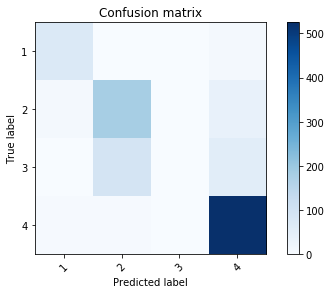

Accuracy :  77.8
Sensitivity for 1 :  87.8048780487805
Sensitivity for 2 :  78.35497835497836
Sensitivity for 3 :  0.0
Sensitivity for 4 :  97.94776119402985


In [16]:
res = model.predict(x_test)
result=np.argmax(res, axis = 1)+1
cal_accuracy(y_test, result)

In [32]:
Decesion_gini=pd.DataFrame([
 [ 78,   2,   1,   1],
 [  9, 126,  89,   7],
 [  6,  56,  73,  16],
 [ 18,  33,  16, 469]], columns=['1','2','3','4'])

In [33]:
Decesion_entropy=pd.DataFrame([
 [ 75,   5,   2,   0],
 [  8, 125,  96,   2],
 [  3,  82,  49,  17],
 [  6,  28,  24, 478]], columns=['1','2','3','4'])

In [37]:
Logistic=pd.DataFrame([
[ 28,  38,   8,   8],
 [ 62, 104,  39,  26],
 [ 10,  79,  49,  13],
 [ 20,  38,  24, 454]], columns=['1','2','3','4'])

In [36]:
Nural=pd.DataFrame([
[ 49,  17,  15,   1],
 [ 12,  94,  71,  54],
 [ 15,  28,  56,  52],
 [ 19,  21,  11, 485]], columns=['1','2','3','4'])

In [48]:
print("Confusion Matrix: ")
print("")
print("Decision Tree with GINI")
display(Decesion_gini)
print("Accuracy :  74.6")
print()
print()
print("Decision Tree with Entropy")
display(Decesion_entropy)
print("Accuracy :  72.7")
print()
print()
print("Logistic Regression with Multi class Classfication")
display(Logistic)
print("Accuracy :  63.5")
print()
print()
print("Nural Network with Multi Class Classfication")
display(Nural)
print("Accuracy :  68.4")

Confusion Matrix: 

Decision Tree with GINI


,1,2,3,4
0,78,2,1,1
1,9,126,89,7
2,6,56,73,16
3,18,33,16,469


Accuracy :  74.6


Decision Tree with Entropy


,1,2,3,4
0,75,5,2,0
1,8,125,96,2
2,3,82,49,17
3,6,28,24,478


Accuracy :  72.7


Logistic Regression with Multi class Classfication


,1,2,3,4
0,28,38,8,8
1,62,104,39,26
2,10,79,49,13
3,20,38,24,454


Accuracy :  63.5


Nural Network with Multi Class Classfication


,1,2,3,4
0,49,17,15,1
1,12,94,71,54
2,15,28,56,52
3,19,21,11,485


Accuracy :  68.4
